In [63]:
import pandas as pd
import numpy as np
import seaborn as sns

In [92]:
df = pd.read_csv('/home/MarkF/Downloads/ICA_components.csv', index_col=0)
df

,consensus independent component 1,consensus independent component 2,consensus independent component 3,consensus independent component 4,consensus independent component 5,consensus independent component 6,consensus independent component 7,consensus independent component 18,consensus independent component 348,consensus independent component 1745
2597,-0.206983,-1.087045,-0.419144,-0.889481,0.625693,-0.464673,-0.266785,-0.726618,-0.164762,0.285228
60,0.501158,0.165651,-0.625709,0.099027,-0.235955,0.153091,0.342420,-0.202325,0.408495,0.360252
780,-0.295855,-0.673554,-0.514096,-0.419716,0.326692,0.270067,-1.095456,0.625201,0.289040,0.049972
3310,-0.571206,-0.934084,-0.074060,0.209428,0.278091,-1.192764,0.226773,0.022257,0.425924,-0.411269
2978,0.285105,0.301577,0.516902,-1.157371,0.426159,0.546608,-0.411458,-0.783864,0.358253,0.091424
...,...,...,...,...,...,...,...,...,...,...
338579,-0.627380,-0.545751,-0.535060,0.331857,0.679470,0.278708,-0.095643,0.745014,0.602500,-0.028983
417,-0.410729,-0.450551,-0.418784,-0.073684,-0.108203,-0.599870,0.074917,0.309492,-0.367740,0.133487
83734,-0.419421,-3.083842,0.561394,-0.763441,-0.373096,-0.414449,-0.217648,-0.133046,-0.032628,0.243284
400759,0.117069,1.311618,0.059919,-0.186525,-0.515730,0.052284,0.060728,1.064629,-0.006565,-0.327760


In [97]:
import numpy as np
from itertools import cycle
s = [-10, 0, 10, 20]
pool = cycle(s)
clusters = {}
for scaler, x in zip(pool, range(0,10)):
    df.iloc[:,x] = df.iloc[:,x] + scaler
    clusters[x] = scaler
    

In [98]:
clusters

{0: -10, 1: 0, 2: 10, 3: 20, 4: -10, 5: 0, 6: 10, 7: 20, 8: -10, 9: 0}

(-25.0, 30.0)

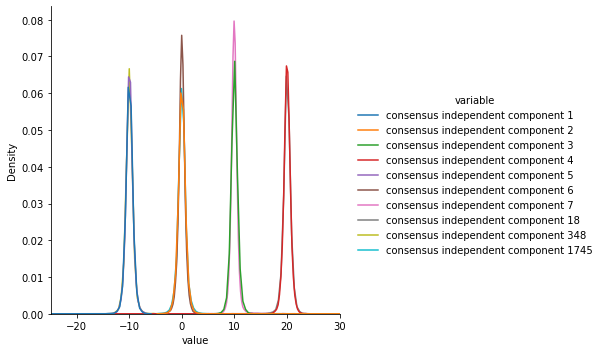

In [95]:
sns.displot(data=df.reset_index(drop=True).reset_index().melt(id_vars='index')
            , x="value", kind="kde", hue='variable')
plt.xlim(-25, 30)

In [127]:
temp = df.corr() 
temp.replace(1, np.nan).max().max()

0.0037736820767389685

In [ ]:
{0: -10, 1: 0, 2: 10, 3: 20, 4: -10, 5: 0, 6: 10, 7: 20, 8: -10, 9: 0}

In [134]:
mx = np.random.normal(0, 1, (1000, 10))
for x in range(0,250):
    mx[x][[0, 4, 8]] =  np.random.normal(2, 1, 1)
for x in range(250, 500):
    mx[x][[1, 5, 9]] =  np.random.normal(2, 1, 1)
for x in range(500, 750):
    mx[x][[2, 6]] =  np.random.normal(2, 1, 1)
for x in range(750, 1000):
    mx[x][[3, 7]] =  np.random.normal(2, 1, 1)
mx = mx.T
mx

array([[ 2.57690596,  2.70713094,  1.39204311, ...,  0.76768514,
         0.8235593 , -1.68359054],
       [ 0.8148329 ,  0.41502159,  0.37903012, ...,  0.9758022 ,
         1.34212174,  1.37781716],
       [-0.88312837,  1.49731152,  0.46404181, ...,  0.61988596,
        -0.39507148, -0.34867636],
       ...,
       [ 0.71082543,  0.30117247,  0.36730844, ...,  2.74229234,
         1.84537344,  0.97770017],
       [ 2.57690596,  2.70713094,  1.39204311, ...,  0.44446577,
         0.19235211,  0.28348259],
       [-1.11612604,  0.33665664,  0.61115896, ..., -0.83860401,
         0.08339696, -1.08471284]])

In [135]:
df.shape

(19635, 10)

In [136]:
mx.shape

(10, 1000)

In [137]:
expression = df@mx

In [138]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100, svd_solver='full')
pca.fit(expression.values)
print(np.round(pca.explained_variance_ratio_,2))

[0.23 0.22 0.16 0.15 0.04 0.04 0.04 0.04 0.04 0.03 0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.  ]


In [139]:
expression.to_csv('/home/MarkF/Downloads/simulation.csv')

In [ ]:
# import seaborn as sns
# sns.clustermap(expression, vmin=-100, vmax=100)

In [124]:
expression

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2597,-144.035118,-398.950998,-316.280451,-263.190070,-250.601145,-344.267398,-260.824292,-207.387249,-255.041654,-246.353403,...,305.885715,319.274972,440.768325,354.062482,409.699719,344.270490,517.336122,263.006743,444.404605,229.634067
60,-138.330491,-396.272276,-311.966284,-263.130685,-246.709649,-344.297852,-256.683023,-207.460506,-250.103668,-241.614200,...,310.516664,324.516220,449.958129,359.024938,417.644224,352.691329,525.531589,269.973245,450.204696,233.468351
780,-139.725990,-400.890157,-314.575337,-262.801161,-250.219853,-344.846037,-260.101425,-209.241762,-252.906195,-246.835922,...,309.863412,326.143044,450.375170,359.446379,419.175829,354.114881,525.944773,271.491980,454.439856,233.721801
3310,-141.442778,-400.535494,-315.889576,-262.109180,-250.973324,-344.915209,-260.726837,-207.379120,-254.874831,-243.257434,...,314.114101,327.622085,452.224371,360.462759,419.268533,352.116207,529.344394,267.057163,451.814073,232.813268
2978,-139.237824,-391.999406,-308.470660,-260.735780,-245.956251,-341.268521,-253.647315,-203.952816,-249.208331,-243.026273,...,304.433665,317.535136,437.934698,350.837656,408.041920,344.361569,518.260780,265.186375,440.519175,226.391101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338579,-136.340579,-398.335698,-311.355167,-260.139798,-247.488805,-343.711494,-258.303698,-207.984719,-249.840483,-241.520645,...,315.476257,331.039585,454.989574,365.072944,424.675797,357.544920,531.686498,273.166636,457.499962,237.889109
417,-145.300142,-406.816818,-322.428764,-269.841124,-254.947594,-351.033207,-264.652767,-212.510752,-259.219284,-251.423964,...,312.485290,325.913190,451.855257,360.464477,418.766767,352.762211,528.962968,269.181286,453.639843,234.336960
83734,-149.106649,-406.660677,-321.945123,-262.411150,-256.869810,-348.535080,-269.208530,-209.003898,-261.541056,-251.343205,...,307.026077,323.226155,444.894395,357.304474,413.013607,347.391475,521.417854,265.811096,450.397294,227.468104
400759,-138.997576,-402.859158,-316.638968,-269.394658,-251.499049,-349.411134,-258.500246,-211.528722,-254.377117,-250.039757,...,314.447183,327.384020,455.161411,360.237005,422.031788,357.275875,535.233068,273.830226,454.157534,234.991249


In [140]:
df1 = pd.read_csv('/home/MarkF/Downloads/SimulationTest/ica_independent_components_consensus.tsv', sep='\t', 
                 index_col=0)

In [141]:
df1

,consensus independent component 1,consensus independent component 2,consensus independent component 3,consensus independent component 4,consensus independent component 5,consensus independent component 6,consensus independent component 7,consensus independent component 8,consensus independent component 9
2597,-0.095597,-0.581857,0.094647,0.243078,-0.140066,1.029817,-0.716942,-0.482299,0.848869
60,0.101455,0.313607,-0.202560,0.422407,0.363937,0.076794,-0.239437,-0.375991,-0.107767
780,-0.831047,0.092419,-0.468554,-0.014301,-0.174941,0.489789,-0.133350,-0.774466,-0.425617
3310,0.266166,-1.221684,-0.494711,-0.422797,-0.524606,0.845037,0.331054,-0.194141,0.120316
2978,-0.278194,0.457561,-0.401862,0.053788,0.310382,-0.371245,-1.073465,0.444442,0.986002
...,...,...,...,...,...,...,...,...,...
338579,0.081912,0.158840,-0.789391,-0.069313,-0.511369,0.318571,0.603804,-0.949757,-0.341657
417,0.120317,-0.629108,0.346423,0.127257,-0.387197,0.451285,-0.000026,-0.401081,-0.400646
83734,0.166936,-0.678363,-0.242508,0.137096,-0.226981,2.863697,-0.281370,0.620395,0.067519
400759,0.035144,0.078606,0.023289,-0.312424,0.085136,-1.312369,-0.219151,0.026106,-1.143764


In [155]:
l = df.copy()
l.columns = [f'{x} old' for x in l.columns]

r = df1.copy()
r.columns = [f'{x} new' for x in r.columns]
temp = l.join(r).corr()
temp = temp.loc[l.columns, r.columns]

<AxesSubplot:>

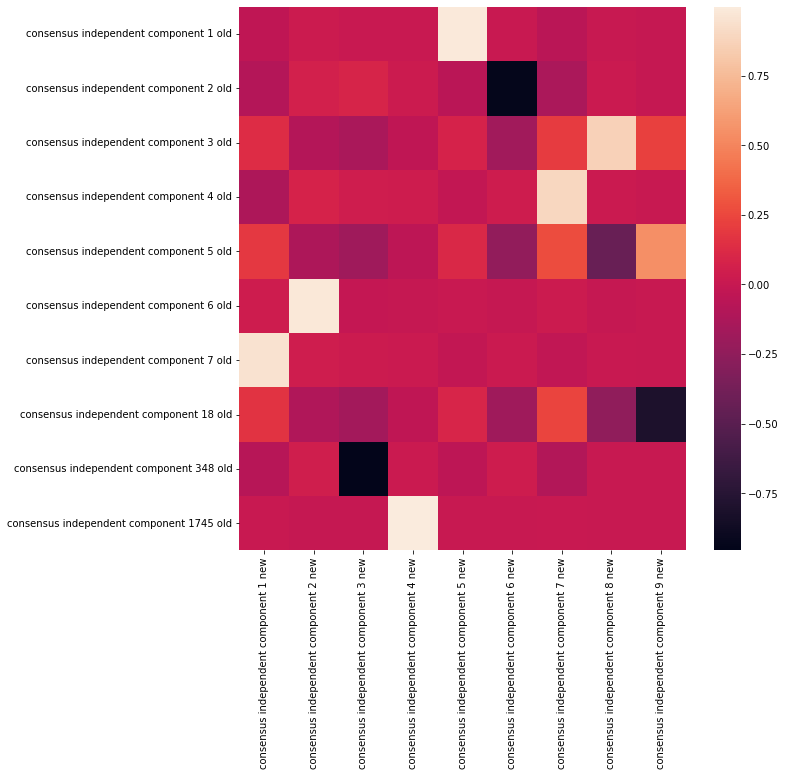

In [157]:
plt.figure(figsize=(10,10))
sns.heatmap(temp)